In [1]:
import warnings

import dash
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from dash import dcc, html
from dash.dependencies import Input, Output, State
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from tools.common_methods import get_train_test_data
from tools.common_methods import print_results

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
X_train, X_test, y_train, y_test = get_train_test_data()

In [3]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
linreg_base = LinearRegression()
linreg_base.fit(X_train_std, y_train)

y_pred = linreg_base.predict(X_test_std)
print_results(y_test, y_pred)

MSE: 275.79128785392084 	R2 score: 0.8222631534996676


In [5]:
results_df = pd.DataFrame(columns=['Amount of components', 'MAE', 'R2 Score'])

for n_components in range(1, 25):
    pca = PCA(n_components=n_components, random_state=1)
    X_train_pca = pca.fit_transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)

    linreg = LinearRegression()
    linreg.fit(X_train_pca, y_train)

    y_pred = linreg.predict(X_test_pca)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance_ratio = sum(pca.explained_variance_ratio_)

    results_df = results_df.append({
        'Amount of components': n_components,
        'MAE': mae,
        'R2 Score': r2
    }, ignore_index=True)

    print(n_components, '- explained variance ratio:', explained_variance_ratio)

1 - explained variance ratio: 0.24964384657679153
2 - explained variance ratio: 0.3751630645568822
3 - explained variance ratio: 0.47612280022965836
4 - explained variance ratio: 0.5396964993229907
5 - explained variance ratio: 0.5948737780849066
6 - explained variance ratio: 0.6435855434799927
7 - explained variance ratio: 0.6867219626625171
8 - explained variance ratio: 0.7271394019224467
9 - explained variance ratio: 0.7651179554014387
10 - explained variance ratio: 0.802301956887641
11 - explained variance ratio: 0.8354085907824268
12 - explained variance ratio: 0.867700275706746
13 - explained variance ratio: 0.8942933937812144
14 - explained variance ratio: 0.9164723050349604
15 - explained variance ratio: 0.9379024645053927
16 - explained variance ratio: 0.9542679993857073
17 - explained variance ratio: 0.9683023742514705
18 - explained variance ratio: 0.9819767752996434
19 - explained variance ratio: 0.9918554287723037
20 - explained variance ratio: 0.9963564715526677
21 - expl


Explained variance ratio (відношення поясненої дисперсії) є міра того, яка частка дисперсії даних утримується кожним з компонентів після виконання аналізу головних компонент (PCA). Вона показує, наскільки важлива кожна компонента для виразності даних. Більше значення цього показника означає, що відповідна компонента пояснює більше варіації в даних. Коли ми використовуємо кілька головних компонент, сума їх відношень поясненої дисперсії вказує на загальний вклад цих компонент у варіативність даних.

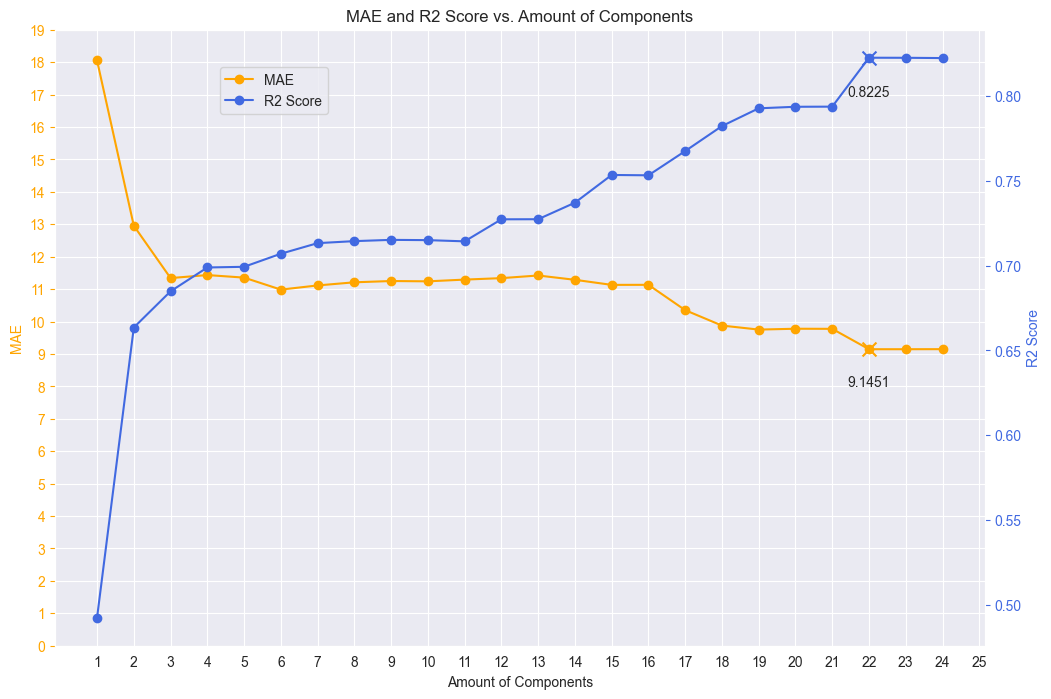

In [6]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

mae_color = 'orange'
best_mae = results_df.loc[results_df['MAE'].idxmin()]
mae_line, = ax1.plot(results_df['Amount of components'], results_df['MAE'], marker='o', label='MAE', color=mae_color)
ax1.scatter(best_mae['Amount of components'], best_mae['MAE'], color=mae_color, s=100, marker='x',
            label=f'Best MAE: {best_mae["MAE"]:.4f}', zorder=5)
ax1.annotate(f'{best_mae["MAE"]:.4f}', xy=(22, 8), ha='center')

ax1.set_xlabel('Amount of Components')
ax1.set_ylabel('MAE', color=mae_color)
ax1.tick_params('y', colors=mae_color)
ax1.set_yticks(range(0, 20))

r2_color = 'royalblue'
best_r2 = results_df.loc[results_df['R2 Score'].idxmax()]
r2_line, = ax2.plot(results_df['Amount of components'], results_df['R2 Score'], marker='o', label='R2 Score',
                    color=r2_color)
ax2.scatter(best_r2['Amount of components'], best_r2['R2 Score'], color=r2_color, s=100, marker='x',
            label=f'Best R2 Score: {best_r2["R2 Score"]:.4f}', zorder=5)
ax2.annotate(f'{best_r2["R2 Score"]:.4f}', xy=(22, 0.8), ha='center')

ax2.set_ylabel('R2 Score', color=r2_color)
ax2.tick_params('y', colors=r2_color)

lines = [mae_line, r2_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, bbox_to_anchor=(0.17, 0.95))
ax1.grid(True)
ax2.grid(False)

plt.title('MAE and R2 Score vs. Amount of Components')
plt.xticks(range(1, 26))
plt.show()

In [7]:
pca = PCA(n_components=2, random_state=1)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [8]:
map_uni_code = pd.read_csv('../readyDatasets/map_uni_code_to_smoothed_means.csv', delimiter='$')
areas = pd.read_excel('../readyDatasets/areas.xlsx')
areas_with_smoothed_means = areas.merge(map_uni_code, on=['uni_code'], how="inner")
new_df = areas_with_smoothed_means.merge(X_train,  left_on='smooth_mean', right_on='uni_code', how="inner")
new_df.drop(columns=['uni_code_y', 'uni_code_x'], inplace=True)
new_df.rename(columns={'smooth_mean': 'uni_code'}, inplace=True)
new_df

,Назва закладу освіти,ownership,city,area,uni_code,form,Орган управління,Усього подано заяв,Подано заяв на бюджет,Допущено до конкурсу,...,Сер. Бал (на загальних підставах),Макс. Бал (на загальних підставах),Рік,Макс. обсяг держзамовлення,СЕР,МІН,МАКС,Ліцензійний обсяг,Регіональний коефіцієнт,spec_full
0,"Вищий навчальний заклад ""Університет економіки...",Приватна,м. Київ,м. Київ,14.766651,1,19.390828,53,31,30,...,174.800000,176.500,17.696067,10.0,151.2,119.8,179.6,25.0,1.00,10.903484
1,"Вищий навчальний заклад ""Університет економіки...",Приватна,м. Київ,м. Київ,14.766651,1,4.690571,202,108,107,...,172.650000,172.650,24.489526,5.0,141.3,117.2,173.6,108.0,1.00,7.854257
2,Державний торговельно-економічний університет,Державна,м. Київ,м. Київ,17.082683,1,19.390828,280,108,106,...,162.428571,168.400,24.489526,7.0,148.9,118.6,186.7,18.0,1.00,12.314086
3,Державний торговельно-економічний університет,Державна,м. Київ,м. Київ,17.082683,1,19.390828,741,494,472,...,196.525000,200.000,19.403548,14.0,160.2,140.0,200.0,72.0,1.00,57.164487
4,Державний торговельно-економічний університет,Державна,м. Київ,м. Київ,17.082683,1,19.390828,1227,589,576,...,182.900000,184.700,24.489526,5.0,148.4,126.3,184.1,23.0,1.00,57.164487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14405,Ніжинський державний університет імені Миколи ...,Державна,м. Ніжин,Чернігівська обл.,5.178932,1,19.390828,3,3,3,...,152.472500,160.280,24.489526,5.0,157.3,144.7,167.0,13.0,1.07,18.032168
14406,Ніжинський державний університет імені Миколи ...,Державна,м. Ніжин,Чернігівська обл.,5.178932,1,19.390828,6,5,5,...,160.545000,160.545,19.403548,5.0,167.4,160.5,179.5,10.0,1.07,22.234079
14407,Ніжинський державний університет імені Миколи ...,Державна,м. Ніжин,Чернігівська обл.,5.178932,1,19.390828,20,16,16,...,166.056000,170.368,19.403548,3.0,158.7,142.8,176.0,14.0,1.07,27.666899
14408,Ніжинський державний університет імені Миколи ...,Державна,м. Ніжин,Чернігівська обл.,5.178932,1,19.390828,12,12,12,...,150.972400,180.597,24.489526,2.0,168.3,140.0,196.1,14.0,1.07,20.868990


In [19]:
column = 'area'

X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
X_train_pca_df[column] = new_df[column]
X_train_pca_df.dropna(inplace=True)
# Dash app
app = dash.Dash(__name__)

# Create dropdown for cities
city_options = [{'label': city, 'value': city} for city in X_train_pca_df[column].unique()]

app.layout = html.Div([
    dcc.Dropdown(
        id='city-dropdown',
        options=city_options,
        multi=True,
        value=[X_train_pca_df[column].unique()[0]],  # default selection
    ),
    html.Br(),
    html.Button('Обрати всі', id='select-all-button', n_clicks=0),
    dcc.Graph(id='scatter-plot'),
])

@app.callback(
    Output('city-dropdown', 'value'),
    [Input('select-all-button', 'n_clicks')],
    [State('city-dropdown', 'options')]
)
def select_all_cities(n_clicks, options):
    if n_clicks % 2 == 1:  # Toggle selection
        return [option['value'] for option in options]
    else:
        return []

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('city-dropdown', 'value')]
)
def update_plot(selected_cities):
    filtered_df = X_train_pca_df[X_train_pca_df[column].isin(selected_cities)]
    fig = px.scatter(filtered_df, x='PC1', y='PC2', color=column)
    return fig

if __name__ == '__main__':
    app.run_server(port=8080)


In [20]:
column = 'Назва закладу освіти'

X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
X_train_pca_df[column] = new_df[column]
X_train_pca_df.dropna(inplace=True)
# Dash app
app = dash.Dash(__name__)

X_train_pca_df[column] = X_train_pca_df[column].apply(lambda x: x[:70])
# Create dropdown for cities
city_options = [{'label': city, 'value': city} for city in X_train_pca_df[column].unique()]

app.layout = html.Div([
    dcc.Dropdown(
        id='city-dropdown',
        options=city_options,
        multi=True,
        value=[X_train_pca_df[column].unique()[0]],  # default selection
    ),
    html.Br(),
    html.Button('Обрати всі', id='select-all-button', n_clicks=0),
    dcc.Graph(id='scatter-plot'),
])

@app.callback(
    Output('city-dropdown', 'value'),
    [Input('select-all-button', 'n_clicks')],
    [State('city-dropdown', 'options')]
)
def select_all_cities(n_clicks, options):
    if n_clicks % 2 == 1:  # Toggle selection
        return [option['value'] for option in options]
    else:
        return []

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('city-dropdown', 'value')]
)
def update_plot(selected_cities):
    filtered_df = X_train_pca_df[X_train_pca_df[column].isin(selected_cities)]
    fig = px.scatter(filtered_df, x='PC1', y='PC2', color=column)
    return fig

if __name__ == '__main__':
    app.run_server(port=8081)


In [21]:
column = 'ownership'

X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
X_train_pca_df[column] = new_df[column]
X_train_pca_df.dropna(inplace=True)
# Dash app
app = dash.Dash(__name__)

# Create dropdown for cities
city_options = [{'label': city, 'value': city} for city in X_train_pca_df[column].unique()]

app.layout = html.Div([
    dcc.Dropdown(
        id='city-dropdown',
        options=city_options,
        multi=True,
        value=[X_train_pca_df[column].unique()[0]],  # default selection
    ),
    html.Br(),
    html.Button('Обрати всі', id='select-all-button', n_clicks=0),
    dcc.Graph(id='scatter-plot'),
])

@app.callback(
    Output('city-dropdown', 'value'),
    [Input('select-all-button', 'n_clicks')],
    [State('city-dropdown', 'options')]
)
def select_all_cities(n_clicks, options):
    if n_clicks % 2 == 1:  # Toggle selection
        return [option['value'] for option in options]
    else:
        return []

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('city-dropdown', 'value')]
)
def update_plot(selected_cities):
    filtered_df = X_train_pca_df[X_train_pca_df[column].isin(selected_cities)]
    fig = px.scatter(filtered_df, x='PC1', y='PC2', color=column)
    return fig

if __name__ == '__main__':
    app.run_server(port=8082)

In [23]:
column = 'spec_full'

X_train_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])
X_train_pca_df[column] = new_df[column]
X_train_pca_df.dropna(inplace=True)
# Dash app
app = dash.Dash(__name__)

# Create dropdown for cities
city_options = [{'label': city, 'value': city} for city in X_train_pca_df[column].unique()]

app.layout = html.Div([
    dcc.Dropdown(
        id='city-dropdown',
        options=city_options,
        multi=True,
        value=[X_train_pca_df[column].unique()[0]],  # default selection
    ),
    html.Br(),
    html.Button('Обрати всі', id='select-all-button', n_clicks=0),
    dcc.Graph(id='scatter-plot'),
])

@app.callback(
    Output('city-dropdown', 'value'),
    [Input('select-all-button', 'n_clicks')],
    [State('city-dropdown', 'options')]
)
def select_all_cities(n_clicks, options):
    if n_clicks % 2 == 1:
        return [option['value'] for option in options]
    else:
        return []

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('city-dropdown', 'value')]
)
def update_plot(selected_cities):
    filtered_df = X_train_pca_df[X_train_pca_df[column].isin(selected_cities)]
    fig = px.scatter(filtered_df, x='PC1', y='PC2', color=column)
    return fig

if __name__ == '__main__':
    app.run_server(port=8083)
